In [12]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs and visualizations
import seaborn as sns  # For advanced data visualization and styling
import numpy as np  # For numerical operations and array manipulations
from datetime import datetime  # To work with date and time data
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model for prediction
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression tasks
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating model performance
from sklearn.linear_model import Ridge, Lasso  # Ridge and Lasso regression for regularization
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting model for regression tasks
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and cross-validation

In [13]:
## Step 1: Load and Inspect Data

df = pd.read_csv('/content/2020-2024-emergency-shelter-occupancy_112024.csv', encoding='latin-1')
# Display the first 5 rows
df.head()
df.head()

,date,city,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,year
0,1/1/2020,Edmonton,Women Emergency,WEAC,WEAC,NaN,66.0,62.0,2020
1,1/1/2020,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70.0,67.0,2020
2,1/1/2020,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,0.0,0.0,2020
3,1/1/2020,Edmonton,Winter Emergency,Hope Mission - Herb Jamieson Winter Emergency,Hope Mission,Herb Jamieson Winter Emergency,60.0,0.0,2020
4,1/1/2020,Edmonton,Winter Emergency,Hope Mission - Mat Emergency Shelter Program,Hope Mission,Mat Emergency Shelter Program,170.0,159.0,2020


In [14]:
#2) Report data types of each column
data_types = df.dtypes
print("Data Types of Each Column:\n", data_types)

# Count categorical and numerical columns
num_categorical = sum(data_types == 'object')
num_numerical = sum((data_types == 'int64') | (data_types == 'float64'))

# Print the number of Numerical and Categorical Columns
print(f"\nNumber of Categorical Columns: {num_categorical}")
print(f"Number of Numerical Columns: {num_numerical}")

Data Types of Each Column:
 date             object
city             object
ShelterType      object
ShelterName      object
Organization     object
Shelter          object
Capacity        float64
Overnight       float64
year              int64
dtype: object

Number of Categorical Columns: 6
Number of Numerical Columns: 3


In [15]:
#3) # Display the basic statistical summary of numerical columns
print("Statistical summary of numerical columns\n")
df.describe()

Statistical summary of numerical columns



,Capacity,Overnight,year
count,191433.000000,192407.000000,197918.000000
mean,36.644779,26.868414,2022.247527
std,100.247851,72.161836,1.357755
min,0.000000,0.000000,2020.000000
25%,0.000000,0.000000,2021.000000
50%,0.000000,0.000000,2022.000000
75%,37.000000,24.000000,2023.000000
max,1028.000000,899.000000,2024.000000


In [16]:
## Step 2: Check for Missing Values and Clean Data
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values (e.g., fill with 0 or drop, depending on analysis needs)
df['Capacity'].fillna(0, inplace=True)
df['Overnight'].fillna(0, inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Missing values:
 date                 0
city                 0
ShelterType          0
ShelterName          0
Organization         0
Shelter         108840
Capacity          6485
Overnight         5511
year                 0
dtype: int64


<ipython-input-16-48157315a032>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Capacity'].fillna(0, inplace=True)
<ipython-input-16-48157315a032>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [17]:
#Step 3: Descriptive Statistics

# Summary statistics for numerical columns
print(df.describe())

# Check unique values for categorical columns
print("Unique cities:", df['city'].unique())
print("Unique shelter names:", df['ShelterName'].nunique())


            Capacity      Overnight           year
count  197918.000000  197918.000000  197918.000000
mean       35.444073      26.120267    2022.247527
std        98.807393      71.287266       1.357755
min         0.000000       0.000000    2020.000000
25%         0.000000       0.000000    2021.000000
50%         0.000000       0.000000    2022.000000
75%        35.000000      22.000000    2023.000000
max      1028.000000     899.000000    2024.000000
Unique cities: ['Edmonton' 'Fort McMurray' 'Grande Prairie' 'Calgary' 'Lethbridge'
 'Medicine Hat' 'Lloydminster' 'Red Deer' 'Lac La Biche' 'Slave Lake'
 'Drayton Valley' 'Wetaskiwin' 'Leduc' 'Peace River' 'Edson' 'Cold Lake'
 'Bow Valley' 'Spruce Grove' 'Strathmore' 'Hinton']
Unique shelter names: 145


In [19]:
# Step 4: Feature Engineering

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Now you can extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

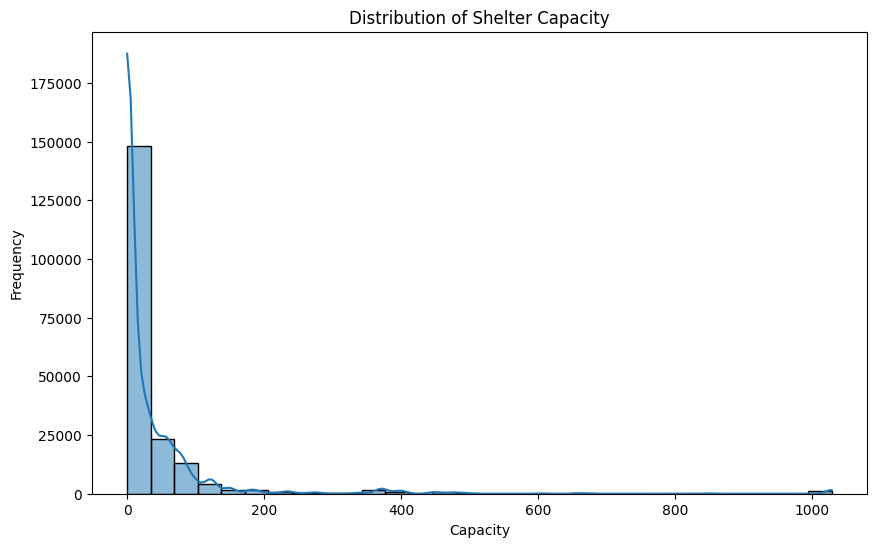

In [20]:
# Step 5: Data Visualization

# 1.Univariate Analysis

# Histogram for Capacity
plt.figure(figsize=(10, 6))
sns.histplot(df['Capacity'], bins=30, kde=True)
plt.title("Distribution of Shelter Capacity")
plt.xlabel("Capacity")
plt.ylabel("Frequency")
plt.title("Distribution of Shelter Capacity")
plt.show()


The graph illustrates the distribution of shelter capacity, highlighting a heavily right-skewed pattern. Most shelters have a small capacity, as evidenced by the highest frequency of values concentrated near the lower end of the capacity scale, around zero. The histogram bars show the count of shelters for various capacity ranges, while the smooth Kernel Density Estimation (KDE) curve overlays the data, providing a probability density estimate. The rapid decline in frequency as capacity increases, along with a long tail extending towards higher capacities, suggests that a majority of shelters have relatively limited capacity, with only a few accommodating significantly larger numbers. This distribution emphasizes the prevalence of smaller shelters in the dataset.

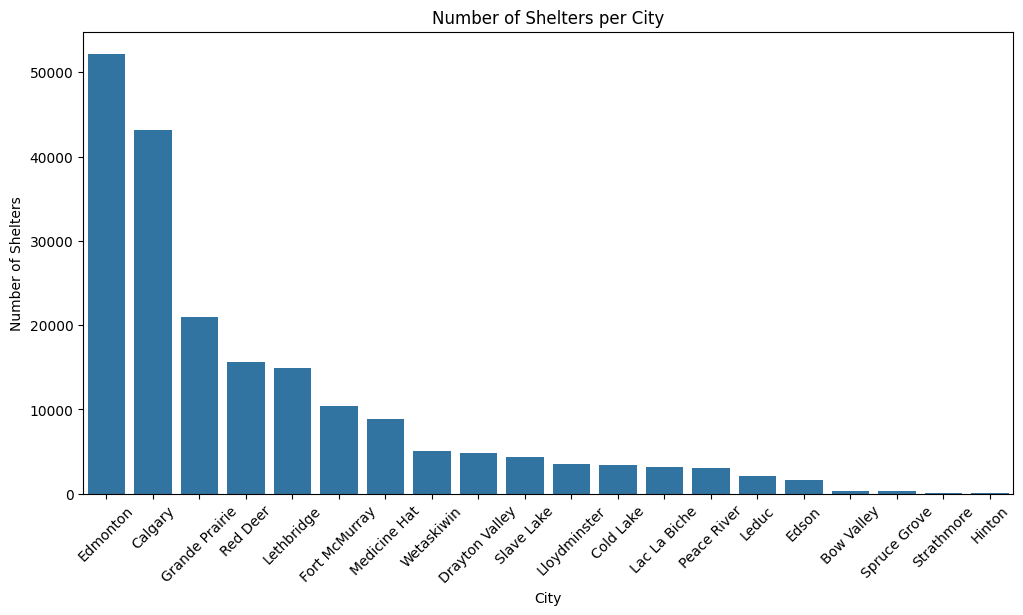

In [21]:
# Bar plot of number of shelters per city
plt.figure(figsize=(12, 6))

sns.countplot(x=df['city'], order=df['city'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Shelters")
plt.title("Number of Shelters per City")
plt.show()

This bar chart illustrates the distribution of shelters across different cities, highlighting Edmonton and Calgary as the cities with the highest number of shelters, with Edmonton slightly exceeding Calgary. The chart also shows a significant drop in shelter numbers for other cities like Grande Prairie, Red Deer, and Lethbridge, which rank next in shelter counts. The rest of the cities, such as Medicine Hat, Wetaskiwin, and Cold Lake, have comparatively fewer shelters, showing a steep decrease after the top five cities. This pattern indicates a concentration of shelters in larger urban areas.

In [22]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Confirm column names are cleaned
print(df.columns)


Index(['date', 'city', 'ShelterType', 'ShelterName', 'Organization', 'Shelter',
       'Capacity', 'Overnight', 'year', 'month', 'day'],
      dtype='object')


In [23]:
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')
df['Overnight'] = pd.to_numeric(df['Overnight'], errors='coerce')

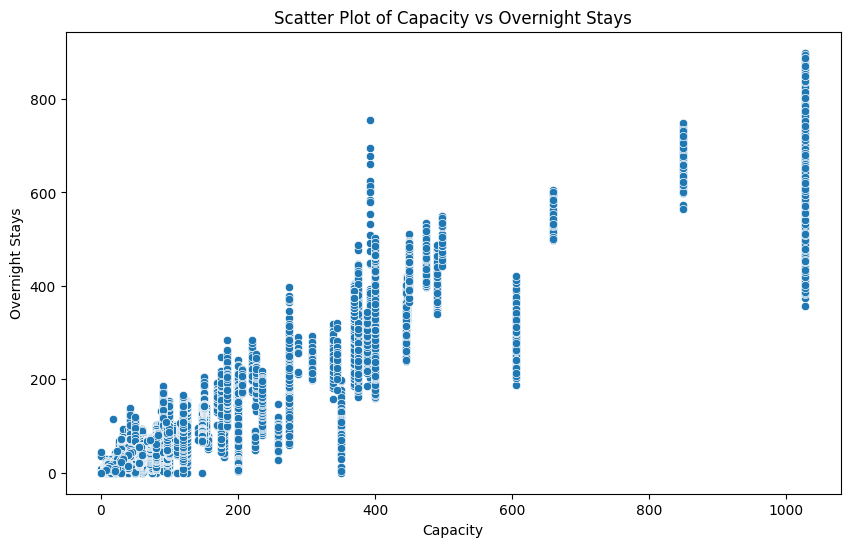

In [24]:
# Step 5: Bivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Capacity vs Overnight stays
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Capacity', y='Overnight', data=df)
plt.title('Scatter Plot of Capacity vs Overnight Stays')
plt.xlabel('Capacity')
plt.ylabel('Overnight Stays')
plt.show()


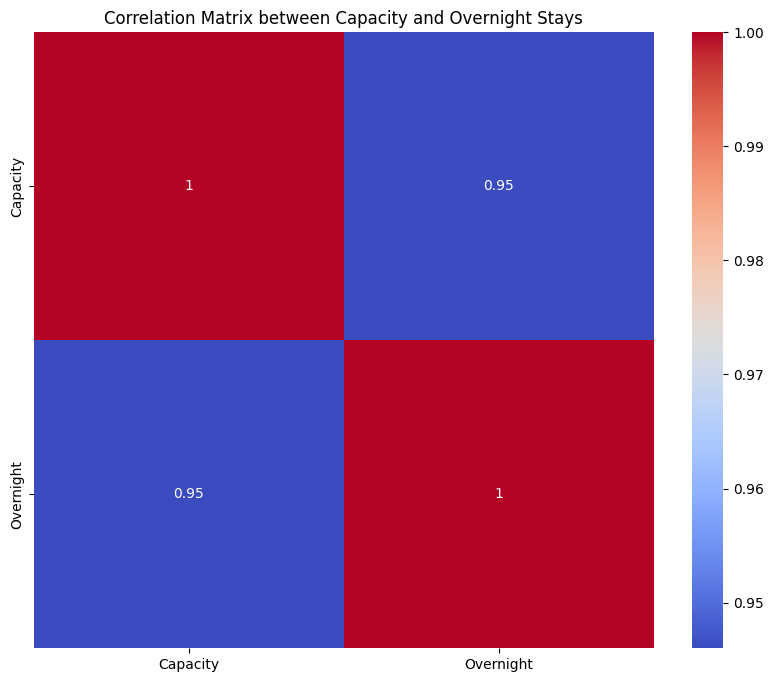

In [25]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Capacity', 'Overnight']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Capacity and Overnight Stays')
plt.show()

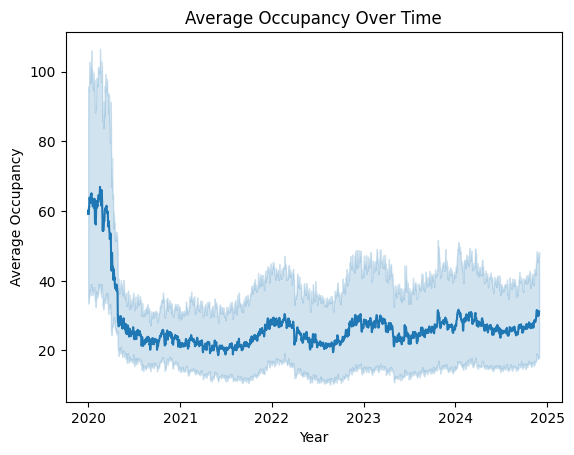

In [26]:
# Time Series Analysis

# Line plot for average occupancy over time

import seaborn as sns

# Assuming 'df' contains the occupancy data with 'date' and 'Overnight' columns
# If you have a separate DataFrame for monthly occupancy, replace 'df' with its name
sns.lineplot(data=df, x='date', y='Overnight')
plt.title('Average Occupancy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Occupancy')
plt.show()

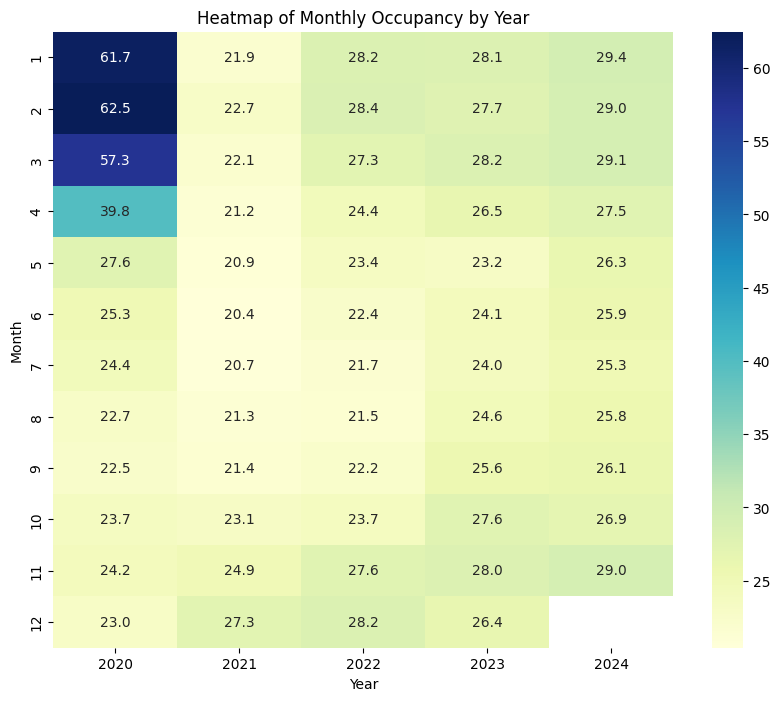

In [27]:
# Heatmap of Monthly Occupancy by Year

# Pivot the data for heatmap
occupancy_pivot = df.pivot_table(index='month', columns='year', values='Overnight', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(occupancy_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap of Monthly Occupancy by Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


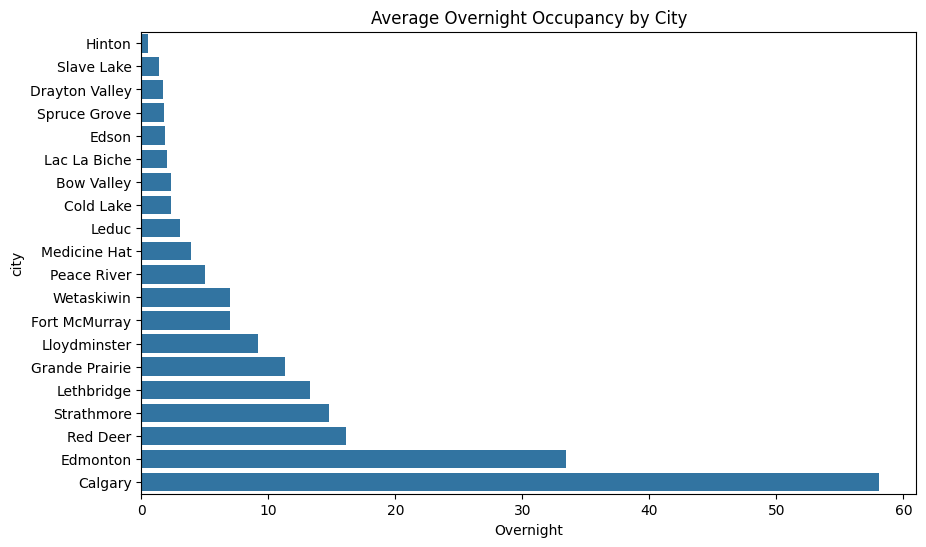

In [28]:
# Step 6: Correlation and Relationships

# Group by city to analyze average occupancy
city_occupancy = df.groupby('city')['Overnight'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_occupancy, y=city_occupancy.index)
plt.title("Average Overnight Occupancy by City")
plt.show()